In [1]:
# Install necessary libraries
!pip install tensorflow

In [2]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility

In [3]:
# Importing necessary components from Keras
from tensorflow.keras.models import Sequential  # Model type to use
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  # Core layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # CNN layers
from tensorflow.keras.utils import to_categorical  # Utility for one-hot encoding
from tensorflow.keras.datasets import mnist  # MNIST dataset

In [4]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print( X_train.shape )

(60000, 28, 28)


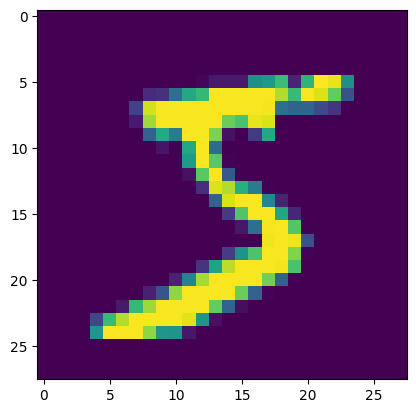

In [6]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [7]:
# 5. Preprocess input data


# Reshape the training data
# The original shape of X_train is (num_samples, 28, 28), where each sample is a 28x28 pixel image.
# We reshape it to (num_samples, 28, 28, 1) to add an extra dimension for the single color channel (grayscale).
# This is necessary because the Conv2D layer in Keras expects input data to have shape (batch_size, height, width, channels).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Reshape the test data
# Similarly, we reshape X_test to (num_samples, 28, 28, 1) for the same reason as above.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
print( X_train.shape )

(60000, 28, 28, 1)


In [9]:
# Convert the training data to float32
# The original data type of X_train is typically uint8 (unsigned 8-bit integer), which ranges from 0 to 255.
# We convert it to float32 to allow for floating-point operations in the subsequent normalization step.
X_train = X_train.astype('float32')

# Convert the test data to float32
# Similarly, we convert X_test to float32.
X_test = X_test.astype('float32')

# Normalize the training data
# The pixel values in X_train range from 0 to 255. We normalize them to the range 0 to 1 by dividing by 255.
# This is a common preprocessing step that helps in faster convergence during training.
X_train /= 255

# Normalize the test data
# We normalize the pixel values in X_test in the same way as the training data to ensure consistency.
X_test /= 255

In [10]:
print( y_train.shape )

(60000,)


In [11]:
# 6. Preprocess class labels

# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Convert the training labels to one-hot encoded format
# Convert the test labels to one-hot encoded format
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [12]:
print( y_train.shape )

(60000,)


In [13]:
# 7. Define model architecture
model = Sequential()

In [14]:
# Add a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and specify the input shape
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

# Add another convolutional layer with 32 filters and a 3x3 kernel, ReLU activation
model.add(Conv2D(32, (3,3), activation='relu')) # ReLU activation is used for non-linearity in the network

# Add a max pooling layer with a 2x2 pool size to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout layer to reduce overfitting by setting 25% of inputs to zero during training
model.add(Dropout(0.25))

In [15]:
# Flatten the 3D output from the convolutional layers to 1D for the fully connected layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer to reduce overfitting by setting 50% of inputs to zero during training
model.add(Dropout(0.5))

# Add the output layer with 10 units (one for each class) and softmax activation for classification
model.add(Dense(10, activation='softmax')) # Softmax activation is used for multi-class classification

In [16]:
# 8. Compile model
model.compile(loss='categorical_crossentropy', # Categorical crossentropy loss function is used for multi-class classification
              optimizer='adam', # Adam optimizer is used for adjusting the learning rate based on the gradient
              metrics=['accuracy']) # Accuracy metric is used for evaluation

In [17]:
# 9. Fit model on training data
model.fit(X_train, Y_train,
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1965 - accuracy: 0.9403
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0826 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0370 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

In [18]:

# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0) # Verbose=0 is used to suppress the progress bar
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02991829812526703
Test accuracy: 0.9923999905586243


- Purpose of the project was to make a CNN classifier with handwritten digits using keras, which recieved more then 99% accuracy
- Deep learning involves neural networks with multiple hidden layers to learn complex data representations. CNNs are specialized for image data, which reduces the number of parameters.

### Steps to Build the CNN:
1. **Environment Setup**: Install Python, SciPy, NumPy, and Matplotlib.
2. **Install Keras and TensorFlow**: Use Anaconda Navigator.
3. **Import Libraries**: Import numpy, Keras components, and MNIST dataset.
4. **Load Data**: Load and split MNIST dataset into training and testing sets.
5. **Preprocess Data**: Reshape, convert to float32, and normalize pixel values.
6. **Preprocess Labels**: Convert class labels to one-hot encoded vectors.
7. **Define Model**: Build CNN with convolutional, pooling, dropout, and dense layers.
8. **Compile Model**: Set loss function, optimizer, and metrics.
9. **Train Model**: Fit the model on training data.
10. **Evaluate Model**: Assess performance on test data.
